In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as st

In [3]:
st.use("ggplot")

In [4]:
df=pd.read_csv("newJordan.csv",usecols=["id","phone","religion","birthday","first","last","gender","lang"])

In [5]:
df=df.drop_duplicates()

In [6]:
df.groupby("gender")["gender"].count()
# plt.legend()

gender
female     977873
male      2054414
Name: gender, dtype: int64

In [7]:
df[df["phone"]>=962785555555].count()

id          2001393
phone       2001393
religion      42755
birthday     114849
first       2001389
last        2001379
gender      1951844
lang        2001393
dtype: int64

check duplicate id

In [8]:
df[df["phone"]<=962785555555].count()

id          1099692
phone       1099692
religion      16014
birthday      44527
first       1099691
last        1099680
gender      1080444
lang        1099692
dtype: int64

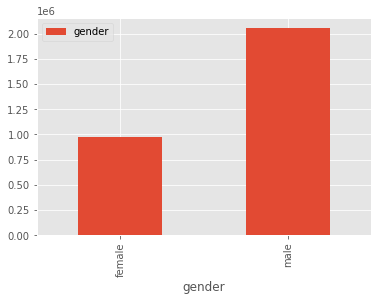

In [9]:
df.groupby("gender")["gender"].count().plot(kind="bar")
plt.legend()

apperently adding or changing a phone number results in duplicate records with the second one being the latter record

In [ ]:
# how droping duplicates affect indexes?
df[df.duplicated("id",keep=False)].sort_values("id")

In [ ]:
df.reset_index()
# df.reindex()

In [12]:
import re

there is 11667 unique religion, not unique really, just the description or the languge used

In [13]:
df.religion.value_counts()

الاسلام                                                                                                 6531
Muslim                                                                                                  5257
Muslim - Sunni                                                                                          4168
Islam                                                                                                   4113
مسلم                                                                                                    3580
                                                                                                        ... 
Muslim and proud (Live Free Or Die Hard)                                                                   1
مسلم سني وألي الفخر                                                                                        1
moslem (i hane nothig .........................shiet i dont need any person on my life                     1
الاسلام (أشهد ان لا

In [14]:
# df.religion.str.findall(".*Mu*.")

In [15]:
newd=df.replace({"religion":[".*(سن|Islam|isl|Musulman|sl|Ислам|SL|Sl|سل|مح|محم).*"]},"Muslim",regex=True)

In [16]:
newd=newd.replace({"religion":[".*(Христианство|sih|seh|cristian|atholic|ch|CH|Ch|مسي).*"]},"Christian",regex=True)

In [17]:
newd=newd.replace({"religion":[".*(God|god|GOD|Other|other).*"]},"Other",regex=True)

In [18]:
newd=newd.replace({"religion":[".*(الله|م|ﺍﻟ|isalam|ﺍﻟﻠﻪ|Isalm|allah|ﻣﺴﻠﻢ|Allah|isalm|لل|الا).*"]},"Muslim",regex=True)

In [19]:
newd=newd.replace({"religion":[".*(indu|udd).*"]},"Hindu & Buddhist",regex=True)

In [20]:
newd=newd.replace({"religion":[".*(uman|UMAN).*"]},"Humanism",regex=True)

In [21]:
newd=newd.replace({"religion":[".*(ruze|urzi).*"]},"Druze",regex=True)

In [22]:
newd=newd.replace({"religion":[".*(ecular|gnostic|Ath|None|none|أدري|no|No|NON|non|NO).*"]},"Non believer",regex=True)

the below script shows that the unique values have reduced from 11667 to 421 with around 400 contributing to 1.5% of total records. 
these 1.5 are strange font, languages and phrases.

In [23]:
newd.religion.value_counts()

Muslim          55743
Christian        1751
Other             593
Non believer      140
Humanism           28
                ...  
durze ()            1
Memes ()            1
00                  1
Neutral ()          1
Metal \m/           1
Name: religion, Length: 424, dtype: int64

In [24]:
newd.religion.value_counts(normalize=True)[:10]*100

Muslim                              94.852641
Christian                            2.979513
Other                                1.009053
Non believer                         0.238225
Humanism                             0.047645
Hindu & Buddhist                     0.035734
Druze                                0.030629
What are your religious beliefs?     0.010210
ا                                    0.010210
musilm ()                            0.006806
Name: religion, dtype: float64

<AxesSubplot:>

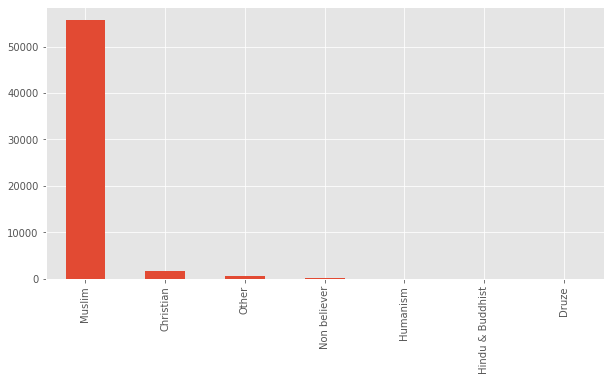

In [66]:
newd[newd.religion.notna()].religion.value_counts()[0:7].plot(figsize=(10,5),kind="bar")

logarithmic scale, graph could be deceiving, islam has 94.853% of the not nan religion values

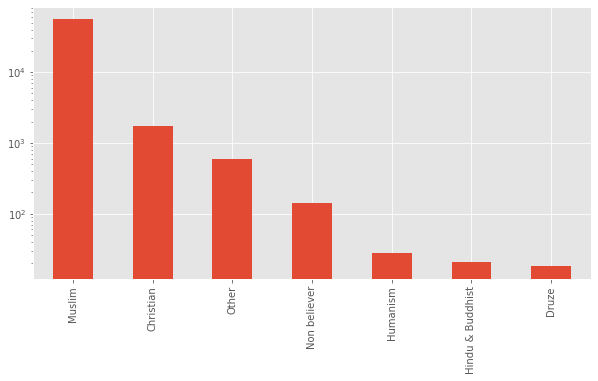

In [65]:
newd[newd.religion.notna()].religion.value_counts()[0:7].plot(figsize=(10,5),kind="bar")
plt.yscale("log")

In [ ]:
df["last"].value_counts().head(30)

<AxesSubplot:>

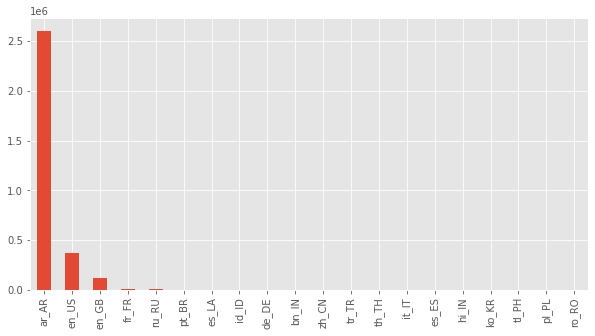

In [64]:
df["lang"].value_counts()[0:20].plot(figsize=(10,5),kind="bar")


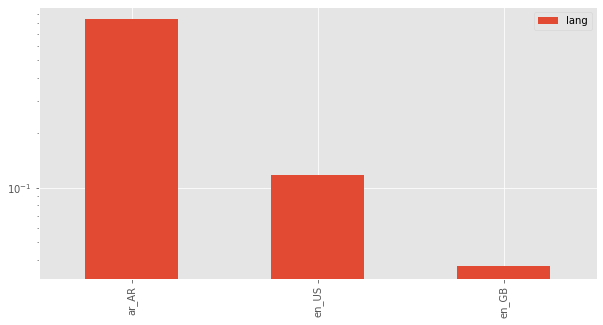

In [63]:
df["lang"].value_counts(normalize=True)[0:3].plot(figsize=(10,5),kind="bar")
plt.legend()
plt.yscale("log")

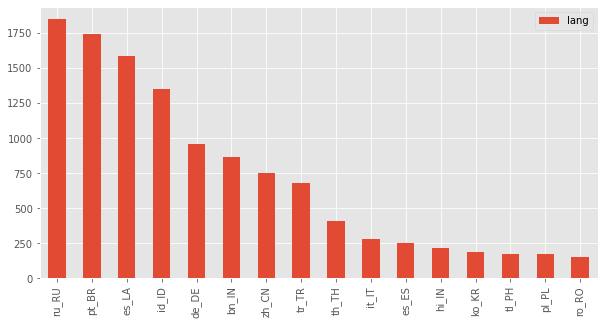

In [62]:
df["lang"].value_counts()[4:20].plot(figsize=(10,5),kind="bar")
plt.legend()


top 20 most common names as they are without cleaning, mohamed for example appeared 3 times in top 20, two times written in different ways in english and once in arabic. and some are not considered first names more like part of a nickname in arabic fathers are called with "father of eldest son name" in the data first name is roughly translated "father of" ... "mother of" is in top 20 also

<AxesSubplot:ylabel='first'>

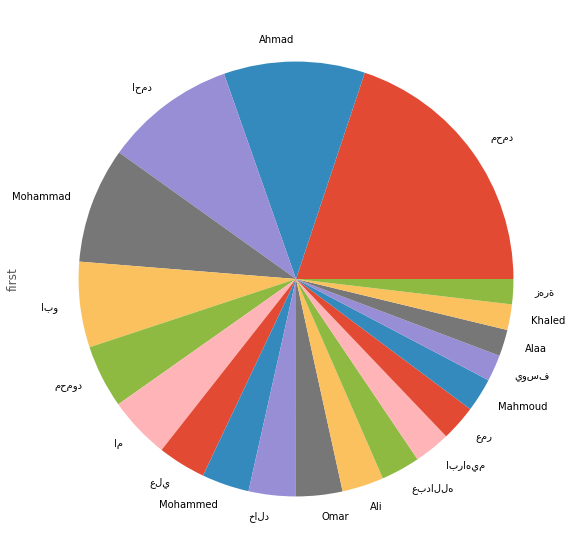

In [61]:
df["first"].value_counts()[:20].plot(figsize=(10,10),kind="pie")
# df.religion.value_counts()